## 04 Linear Regression - Capital Bike Share

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###  1. Overview

#### About the data

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as

$$ \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i+1)−log(a_i+1))^2} $$

#### Submission Format

Your submission file must have a header and should be structured in the following format:

```
datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
```

#### Data Fields

| Column     | Meaning |
|:-----------|:----------|
| datetime   | hourly date + timestamp |
| season     | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| holiday    | whether the day is considered a holiday |
| workingday | whether the day is neither a weekend nor holiday |
| weather    | 1: Clear, Few clouds, Partly cloudy |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp       | temperature in Celsius |
| atemp      | "feels like" temperature in Celsius |
| humidity   | relative humidity |
| windspeed  | wind speed |
| casual     | number of non-registered user rentals initiated |
| registered | number of registered user rentals initiated |
| count      | number of total rentals |

#### Read In The Dataset

In [2]:
df = pd.read_csv('_RES/train.csv')

###  2. Train/Test Split

In [3]:
X = df.drop(['casual', 'registered'], axis=1)

In [4]:
y = df[['count']]
# y = df[['datetime', 'count']].set_index('datetime')

In [5]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
y.head()

,count
0,16
1,40
2,32
3,13
4,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7293, 10), (3593, 10), (7293, 1), (3593, 1))

### 3. Exploratory Data Analysis

#### Size of the Dataset

In [9]:
X_train.shape, X_test.shape

((7293, 10), (3593, 10))

#### Print a few Rows of the Dataset

In [10]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
5263,2011-12-13 09:00:00,4,0,1,1,10.66,12.880,60,11.0014,233
5261,2011-12-13 07:00:00,4,0,1,1,6.56,8.335,80,11.0014,223
1442,2011-04-05 23:00:00,2,0,1,1,12.30,14.395,49,19.0012,26
3690,2011-09-04 16:00:00,3,0,0,1,32.80,38.635,59,15.0013,337
1194,2011-03-14 12:00:00,1,0,1,1,15.58,19.695,37,0.0000,94


In [11]:
X_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
5029,2011-12-03 15:00:00,4,0,0,1,15.58,19.695,46,0.0000,337
2883,2011-07-09 01:00:00,3,0,0,2,26.24,28.790,89,7.0015,53
522,2011-02-04 22:00:00,1,0,1,2,9.84,12.120,65,11.0014,46
2992,2011-07-13 14:00:00,3,0,1,3,33.62,37.880,46,8.9981,116
7230,2012-04-19 15:00:00,2,0,1,1,24.60,31.060,43,0.0000,262


#### Infos about dataset

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 5263 to 8787
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    7293 non-null   object 
 1   season      7293 non-null   int64  
 2   holiday     7293 non-null   int64  
 3   workingday  7293 non-null   int64  
 4   weather     7293 non-null   int64  
 5   temp        7293 non-null   float64
 6   atemp       7293 non-null   float64
 7   humidity    7293 non-null   int64  
 8   windspeed   7293 non-null   float64
 9   count       7293 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 626.7+ KB


#### Descriptive Statistics

In [13]:
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,2.511038,0.026875,0.684355,1.417798,20.306722,23.742171,61.758536,12.838203,191.351022
std,1.115416,0.161729,0.464804,0.631715,7.762482,8.443325,19.312675,8.137154,180.287957
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,43.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,12.998000,147.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,44.695000,100.000000,56.996900,970.000000


#### Add new columns for dates

In [14]:
ts_train = pd.to_datetime(X_train['datetime'])
ts_test = pd.to_datetime(X_test['datetime'])

In [15]:
ts_train, ts_test

(5263    2011-12-13 09:00:00
 5261    2011-12-13 07:00:00
 1442    2011-04-05 23:00:00
 3690    2011-09-04 16:00:00
 1194    2011-03-14 12:00:00
                 ...        
 6175    2012-02-13 13:00:00
 9704    2012-10-08 17:00:00
 10185   2012-11-09 19:00:00
 9256    2012-09-09 01:00:00
 8787    2012-08-08 12:00:00
 Name: datetime, Length: 7293, dtype: datetime64[ns],
 5029   2011-12-03 15:00:00
 2883   2011-07-09 01:00:00
 522    2011-02-04 22:00:00
 2992   2011-07-13 14:00:00
 7230   2012-04-19 15:00:00
                ...        
 6843   2012-04-03 11:00:00
 7496   2012-05-11 17:00:00
 3053   2011-07-16 03:00:00
 732    2011-02-13 21:00:00
 8757   2012-08-07 06:00:00
 Name: datetime, Length: 3593, dtype: datetime64[ns])

In [16]:
ts_train.dt.date, ts_test.dt.date

(5263     2011-12-13
 5261     2011-12-13
 1442     2011-04-05
 3690     2011-09-04
 1194     2011-03-14
             ...    
 6175     2012-02-13
 9704     2012-10-08
 10185    2012-11-09
 9256     2012-09-09
 8787     2012-08-08
 Name: datetime, Length: 7293, dtype: object,
 5029    2011-12-03
 2883    2011-07-09
 522     2011-02-04
 2992    2011-07-13
 7230    2012-04-19
            ...    
 6843    2012-04-03
 7496    2012-05-11
 3053    2011-07-16
 732     2011-02-13
 8757    2012-08-07
 Name: datetime, Length: 3593, dtype: object)

In [17]:
def create_time_features(df):
    '''
    Taking the datetime object and create new columns for date, year, month, day, weekday, hour
    
    Params
    ------
    
    df: the dataframe that needs to be converted
    '''
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['datetime']).dt.date
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['day'] = pd.to_datetime(df['datetime']).dt.day
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday
    return df    

In [18]:
X_train_EDA = create_time_features(X_train)

In [19]:
X_train_EDA

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,year,month,day,hour,weekday
5263,2011-12-13 09:00:00,4,0,1,1,10.66,12.880,60,11.0014,233,2011-12-13,2011,12,13,9,1
5261,2011-12-13 07:00:00,4,0,1,1,6.56,8.335,80,11.0014,223,2011-12-13,2011,12,13,7,1
1442,2011-04-05 23:00:00,2,0,1,1,12.30,14.395,49,19.0012,26,2011-04-05,2011,4,5,23,1
3690,2011-09-04 16:00:00,3,0,0,1,32.80,38.635,59,15.0013,337,2011-09-04,2011,9,4,16,6
1194,2011-03-14 12:00:00,1,0,1,1,15.58,19.695,37,0.0000,94,2011-03-14,2011,3,14,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,2012-02-13 13:00:00,1,0,1,1,13.12,15.150,22,15.0013,140,2012-02-13,2012,2,13,13,0
9704,2012-10-08 17:00:00,4,1,0,2,17.22,21.210,66,16.9979,497,2012-10-08,2012,10,8,17,0
10185,2012-11-09 19:00:00,4,0,1,1,13.94,17.425,71,6.0032,361,2012-11-09,2012,11,9,19,4
9256,2012-09-09 01:00:00,3,0,0,1,22.96,26.515,73,15.0013,124,2012-09-09,2012,9,9,1,6


#### Check for missing values

In [20]:
X_train_EDA.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
date          0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

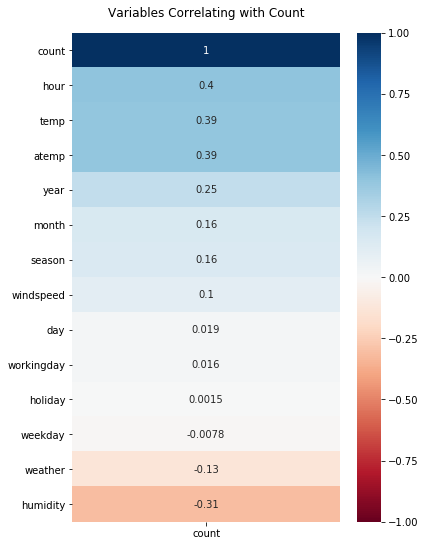

In [21]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(X_train_EDA.corr()[['count']].sort_values(by='count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')

heatmap.set_title('Variables Correlating with Count', fontdict={'fontsize':12}, pad=16);

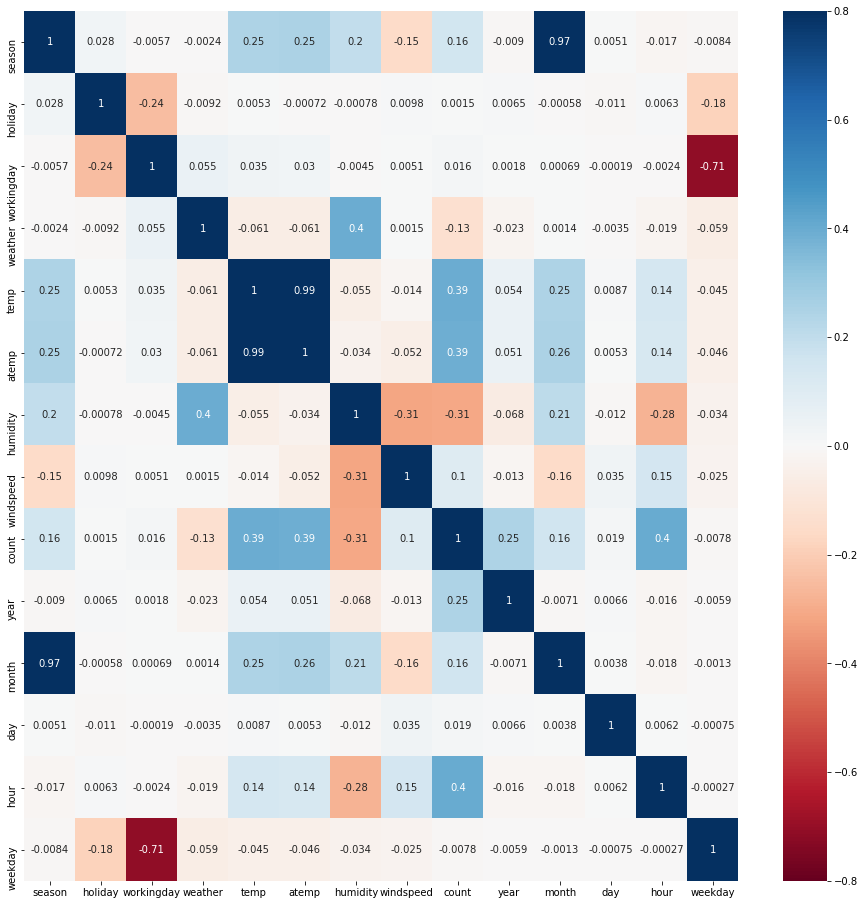

In [22]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(X_train_EDA.corr(), vmin=-.8, vmax=.8, annot=True, cmap='RdBu')

#### 'Season' Insights

In [23]:
X_train_EDA.groupby(['season'])['count'].mean()

season
1    116.630666
2    218.231694
3    231.221436
4    197.363983
Name: count, dtype: float64

Text(0.5, 1.0, 'Boxplot on count across season')

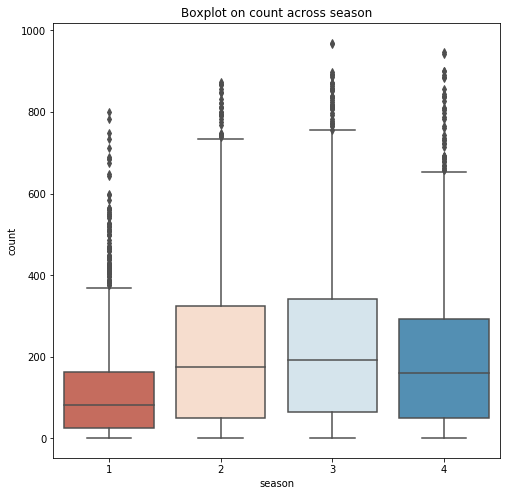

In [24]:
plt.figure(figsize = (8,8))
sns.boxplot(data = X_train_EDA, x = "season", y = "count", palette='RdBu').set_title('Boxplot on count across season')

#### 'Date' Insights

Text(0.5, 1.0, 'Bar plot on count by month')

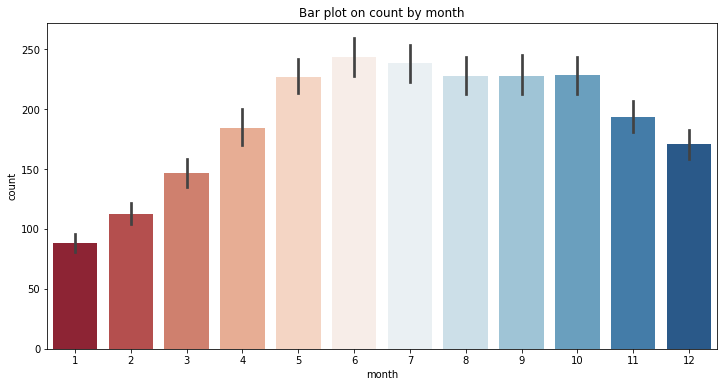

In [25]:
plt.figure(figsize=(12,6))

sns.barplot(data=X_train_EDA, x="month", y="count", palette='RdBu').set_title("Bar plot on count by month")

#### "Doesn't look like anything to me"

Text(0.5, 1.0, 'Lineplot on count by day')

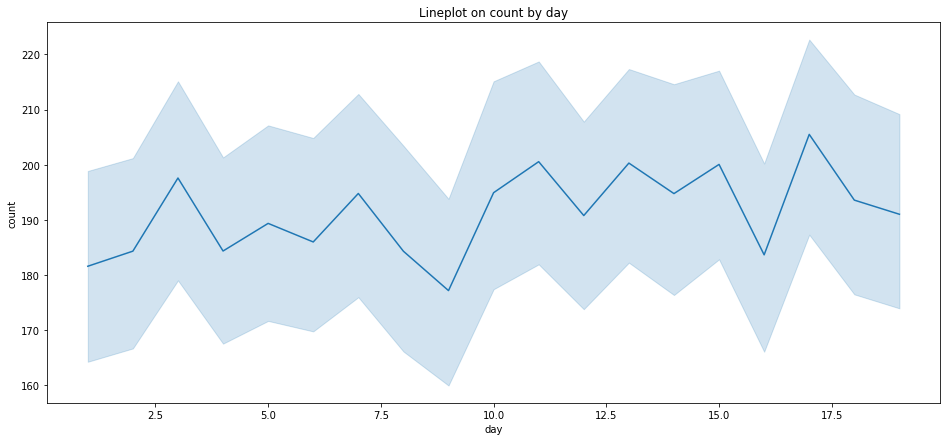

In [26]:
plt.figure(figsize=(16,7))

sns.lineplot(data=X_train_EDA, x='day', y='count', palette='RdBu').set_title("Lineplot on count by day")

#### Any significant differences in users by weekday?

Text(0.5, 1.0, 'Barplot on count by weekday')

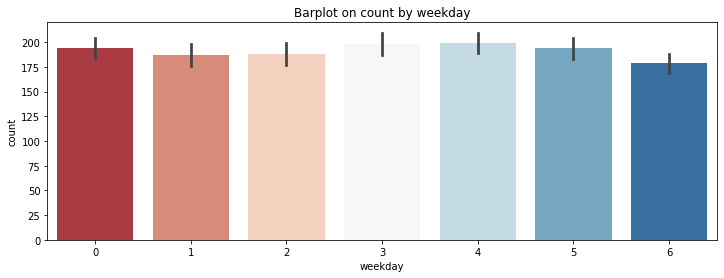

In [27]:
plt.figure(figsize=(12,4))

sns.barplot(data=X_train_EDA, x='weekday', y='count', palette='RdBu').set_title("Barplot on count by weekday")

Text(0.5, 1.0, 'Pointplot on count by hour and weekdays')

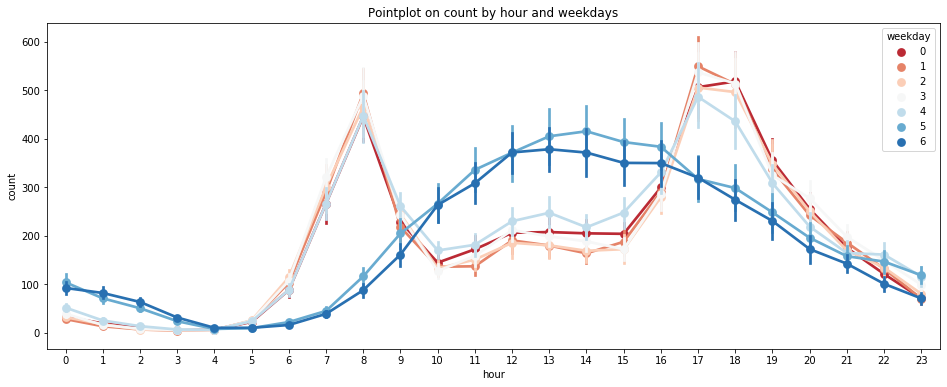

In [28]:
plt.figure(figsize=(16,6))

sns.pointplot(x = "hour", y = "count", data = X_train_EDA, hue = "weekday", palette = "RdBu", legend='full').set_title("Pointplot on count by hour and weekdays")

#### Let's see if there is a significant increase in user count over the weeks

In [29]:
X_train_EDA['datetime'] = pd.to_datetime(X_train_EDA['datetime'])

In [30]:
X_train_EDA.set_index('datetime', inplace=True)

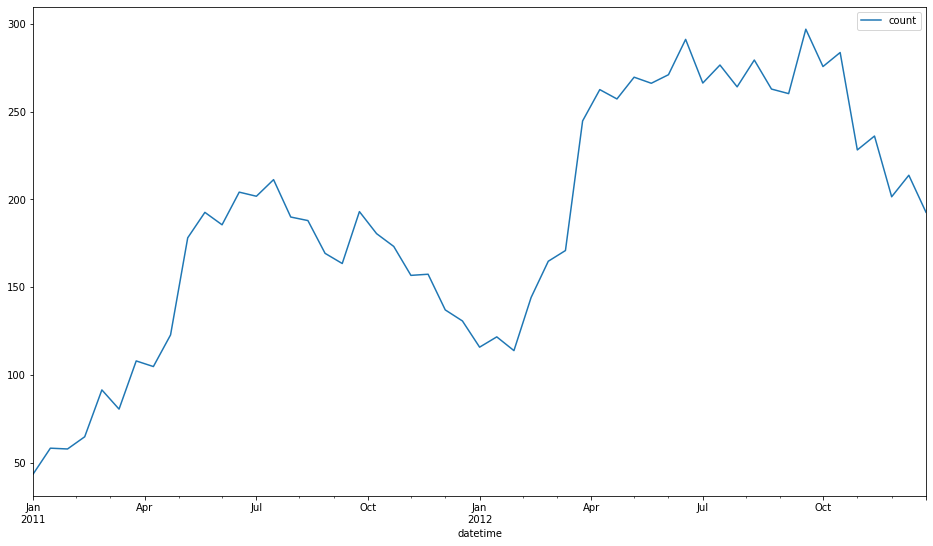

In [31]:
X_train_EDA.resample('2W').mean().plot(y='count', figsize=(16,9))

###  4. Feature Engineering

In [70]:
X_train_EDA.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'date', 'year', 'month', 'day',
       'hour', 'weekday'],
      dtype='object')

In [269]:
dummy_features = ['year', 'month', 'hour', 'workingday']
passthrough_features = ['atemp', 'holiday', 'humidity', 'day']
interaction_features = ['weather']

In [270]:
column_transformer = ColumnTransformer(transformers=[
                        ('dummy', OneHotEncoder(), dummy_features),
                        ('interaction_polynomial', PolynomialFeatures(degree=4), interaction_features), 
                        ('pass', 'passthrough', passthrough_features)
                        ])                                       

In [271]:
transformer_pipeline = Pipeline(steps=[
                        ('create_time', FunctionTransformer(create_time_features)),
                        ('column_transformer', column_transformer)
])

In [272]:
X_train_transformed = transformer_pipeline.fit_transform(X_train)

###  5. Train A Model

#### Train baseline model

In [273]:
m_BL = DummyRegressor(strategy='mean')

In [274]:
m_BL.fit(X_train_transformed, y_train)

DummyRegressor()

#### Train Linear Regression Model

In [275]:
m_LinReg = LinearRegression()

In [276]:
m_LinReg.fit(X_train_transformed, y_train)

LinearRegression()

In [277]:
print("Linear Regression Coefficients:", m_LinReg.coef_)
print("Linear Regression Intercept   :", m_LinReg.intercept_)

Linear Regression Coefficients: [[-4.40859839e+01  4.40859839e+01 -6.02497658e+01 -4.79628688e+01
  -3.24478149e+01 -3.62864375e+00  2.78243009e+01  1.52372798e+01
  -6.17664832e+00  8.02851559e-01  2.32980398e+01  4.10688388e+01
   2.52929860e+01  1.69414449e+01 -1.27187804e+02 -1.44285860e+02
  -1.52675486e+02 -1.69738916e+02 -1.69696463e+02 -1.50028028e+02
  -8.89786697e+01  4.64767906e+01  1.80300130e+02  4.13748093e+01
  -1.94942605e+01  6.90168370e+00  4.93102452e+01  5.02230455e+01
   3.07243330e+01  3.68894716e+01  1.03731957e+02  2.55769250e+02
   2.34062903e+02  1.12453820e+02  3.71120626e+01 -1.92917713e+01
  -5.23244812e+01 -9.16287623e+01 -1.77254544e+00  1.77254544e+00
   2.86596663e-13  2.23706844e+00  2.38160526e+00 -2.86705369e+00
  -1.73298894e-01  4.21215276e+00 -4.17352747e+00 -7.53159792e-01
   4.00697658e-01]]
Linear Regression Intercept   : [138.42463849]


In [278]:
print("Baseline train score :", m_BL.score(X_train_transformed, y_train))
print("Baseline test score  :", m_BL.score(X_test_transformed, y_test))

Baseline train score : 0.0
Baseline test score  : -1.3664036797589318e-05


In [279]:
print("Linear Regression train score :", m_LinReg.score(X_train_transformed, y_train))

Linear Regression train score : 0.6948718914160716


###  6. Cross-Validation

###  7. Optimize The Model Iteratively

Select features, try different regressors (e.g. Linear Regression, Random Forest Regressor, SVR)

###  8. Calculate Test Score

In [280]:
X_test_transformed = transformer_pipeline.fit_transform(X_test)

In [281]:
m_LinReg.fit(X_test_transformed, y_test)

LinearRegression()

In [282]:
print("Linear Regression test score  :", m_LinReg.score(X_test_transformed, y_test))

Linear Regression test score  : 0.694108409622181


In [268]:
ypred_LinReg = m_LinReg.predict(X_test_transformed)

#### Model Performance for "Hour"

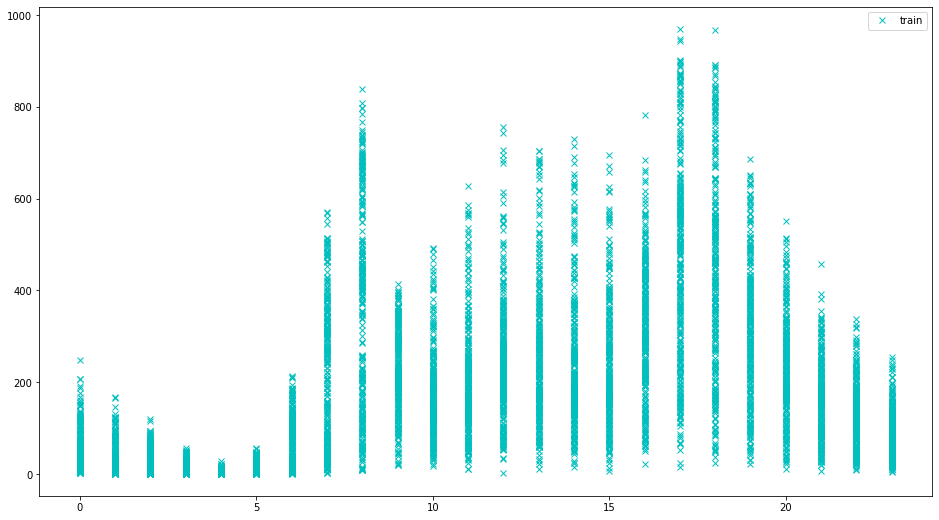

In [283]:
plt.figure(figsize=(16,9))
 
plt.plot(X_train_EDA['hour'], y_train, 'cx', label="train")
# plt.plot(X_test['hour'], y_test, 'r.', label="test")
# plt.plot(X_train_transformed['hour'], ypred_LinReg, 'o', label="fit")
plt.legend()

#### Model Performance for "Temperature"

In [121]:
# plt.figure(figsize=(16,9))
#  
# plt.plot(X_train_transformed['temp'], y_train, 'cx', label="train")
# plt.plot(X_test_transformed['temp'], y_test, 'r.', label="test")
# plt.plot(X_test_transformed['temp'], ypred_LinReg, 'o', label="fit")
# plt.legend()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1152x648 with 0 Axes>

###  9. Submit To Kaggle